# Assignment Code: DA-AG-009
# Supervised Classification: Decision Trees, SVM, and Naive Bayes|



# Question 1 :
**What is Information Gain, and how is it used in Decision Trees?**


**Answer:**

In **Decision Trees**, the goal is to split the dataset such that the **uncertainty or impurity** in the target variable is minimized.  
**Information Gain (IG)** is a key metric used to decide the **best attribute** to split on.

---

## A. Entropy (Measure of Uncertainty)
Entropy measures the amount of **uncertainty or disorder** in a dataset.

**Formula:**

$$
H(D) = - \sum_{i=1}^{n} p_i \log_2 p_i
$$

Where:  
- \(D\) = dataset  
- \(n\) = number of classes  
- \(p_i\) = probability of class \(i\) in dataset \(D\)

**Interpretation:**  
- \(H(D) = 0\) → dataset is **pure** (all examples belong to one class)  
- Maximum \(H(D)\) → dataset is **highly impure**  

---

## B. Information Gain
Information Gain measures the **reduction in entropy** after splitting a dataset on an attribute \(A\).

**Formula:**

$$
IG(D, A) = H(D) - \sum_{v \in \text{Values}(A)} \frac{|D_v|}{|D|} H(D_v)
$$

Where:  
- \(D\) = original dataset  
- \(A\) = attribute to split  
- \(D_v\) = subset where attribute \(A\) has value \(v\)  
- \(|D_v|/|D|\) = weight of subset  

**Interpretation:**  
- Higher IG → attribute **better separates the data**  
- Decision Tree chooses **attribute with max IG** at each node.

---

## C. Example

Dataset of 14 days for playing cricket:

| Outlook   | Play Cricket |
|-----------|--------------|
| Sunny     | No           |
| Sunny     | No           |
| Overcast  | Yes          |
| Rainy     | Yes          |
| ...       | ...          |

**Steps:**  
1. Calculate **Entropy of target** \(H(\text{Play Cricket})\)  
2. Calculate **Entropy after splitting** by `Outlook`  
3. Compute **Information Gain**:

$$
IG(\text{Play Cricket}, \text{Outlook}) = H(\text{Play Cricket}) - H(\text{Play Cricket | Outlook})
$$

- Attribute with **highest IG** becomes the **root node**.

---

## D. How Decision Tree Uses Information Gain
1. Calculate **Entropy** of the target variable.  
2. For each attribute, calculate **IG**.  
3. Choose attribute with **maximum IG** as **splitting node**.  
4. Repeat recursively until:  
   - All nodes are **pure**, or  
   - **Stopping criteria** are met  

**Flow Diagram (Mermaid):**


flowchart TD
A[Start: Dataset] --> B[Calculate Entropy of target]
B --> C[Calculate IG for all attributes]
C --> D{Attribute with max IG?}
D --> E[Split dataset using this attribute]
E --> F[Repeat for each child node until stopping criteria]
F --> G[Decision Tree Ready]


# E. Key Points

- **Entropy (H)** → measures **disorder**  
- **Information Gain (IG)** → measures **reduction in disorder**  
- **Decision Tree** maximizes **IG** to choose splits  
- **IG** helps in **automatic feature selection**

---

## F. Decision Tree Diagram Example


             Outlook
            /   |   \
         Sunny Overcast Rainy
          /       |       \
        No       Yes       Yes/No




- Split chosen because **Outlook has highest IG**  
- Leaves represent **pure nodes**


# Question 2:
**What is the difference between Gini Impurity and Entropy?**

**Answer:**

In **Decision Trees**, choosing the best attribute to split the dataset requires measuring **impurity** or **uncertainty**. Two common measures are:

a. **Gini Impurity**  
b. **Entropy (Information Gain)**  

Both help determine **how “pure” or “mixed” a node is**.

---

## A. Gini Impurity

**Definition:**  
Gini Impurity measures the probability of incorrectly classifying a randomly chosen element from the dataset if it were randomly labeled according to the distribution of classes.  

**Formula:**  

\[
Gini(D) = 1 - \sum_{i=1}^{n} p_i^2
\]

Where:  
- \(D\) = dataset  
- \(n\) = number of classes  
- \(p_i\) = probability of class \(i\) in dataset \(D\)  

**Example:**  
Consider a node with 10 samples: 6 positive (Yes) and 4 negative (No).  

\[
p_{Yes} = \frac{6}{10} = 0.6, \quad p_{No} = \frac{4}{10} = 0.4
\]

\[
Gini = 1 - (0.6^2 + 0.4^2) = 1 - (0.36 + 0.16) = 0.48
\]

- **Interpretation:** Lower Gini → node is **more pure**.

---

## B. Entropy

**Definition:**  
Entropy measures the **uncertainty** or **disorder** in the dataset. It tells us how “mixed” the classes are.  

**Formula:**  

\[
H(D) = - \sum_{i=1}^{n} p_i \log_2 p_i
\]

**Example:**  
Using the same dataset (6 Yes, 4 No):

\[
H(D) = - (0.6 \log_2 0.6 + 0.4 \log_2 0.4)
\]

\[
H(D) = - (0.6 \times -0.737 + 0.4 \times -1.322) \approx 0.971
\]

- **Interpretation:** Higher entropy → node is **more impure or uncertain**.

---

## C. Comparison Table

| Feature                | Gini Impurity                          | Entropy (Information Gain)               |
|------------------------|---------------------------------------|----------------------------------------|
| **Definition**         | Probability of misclassification      | Measure of uncertainty or disorder      |
| **Formula**            | \(1 - \sum p_i^2\)                    | \(- \sum p_i \log_2 p_i\)             |
| **Range**              | 0 (pure) to <1 (max impurity)         | 0 (pure) to log₂(n) (max impurity)     |
| **Computation**        | Simple, faster                         | Slightly complex (logarithms)          |
| **Sensitivity**        | Less sensitive to small probability changes | More sensitive to probability changes |
| **Use Cases**          | CART Decision Trees                     | ID3/C4.5 Decision Trees                 |
| **Strengths**          | Fast, easy, works well for large datasets | More theoretically accurate            |
| **Weaknesses**         | Less precise for small probability differences | Slightly slower, uses logarithms      |

---

## D. Key Points

- Both are used to **measure node impurity** in decision trees.  
- **Gini Impurity** is faster and practical for large datasets.  
- **Entropy** is more precise for measuring uncertainty.  
- Both metrics help choose the **best attribute** for splitting.  
- Decision Tree algorithms often **maximize reduction in impurity** (Gini or Entropy) to create **pure child nodes**.

---

## E. Visual Example

Consider a node with the following class distribution:  

Node: 10 samples
Yes: 6
No: 4

Gini = 0.48
Entropy = 0.971


- If we split on an attribute and child nodes become **pure** (all Yes or all No), both **Gini → 0** and **Entropy → 0**.  
- The **attribute causing maximum reduction** in impurity is chosen for splitting.

---

## F. Summary

- **Gini Impurity**: Simpler, faster, commonly used in CART.  
- **Entropy**: Slightly complex, theoretically grounded, used in ID3/C4.5.  
- Both help in **feature selection** during decision tree construction.  
- **Example calculations** show how each metric quantifies purity/impurity of a node.


# Question 3:
**What is Pre-Pruning in Decision Trees?**


**Answer:**


**Pre-Pruning**, also known as **Early Stopping**, is a technique used in **Decision Tree algorithms** to prevent the tree from **growing too large** and **overfitting** the training data.  

- If a tree grows without limits, it may perfectly classify training data but **perform poorly on unseen data**.  
- Pre-Pruning stops the growth of the tree **before it becomes too complex**.

---

## A. How Pre-Pruning Works
During the tree-building process:

1. At each node, the algorithm checks if splitting improves the model significantly.  
2. If the improvement is **not significant**, the split is **stopped**, and the node becomes a **leaf**.  
3. Common criteria for stopping include:  
   - Minimum number of samples in a node  
   - Maximum depth of the tree  
   - Minimum information gain / impurity reduction  

**B Flow of Pre-Pruning:**
open=```mermaid  
flowchart TD
A[Start: Root Node] --> B[Check Splitting Criteria]
B --> C{Is split significant?}
C -- Yes --> D[Split Node and Repeat for Children]
C -- No --> E[Stop Split → Make Leaf Node]
D --> B 

close='''





## C. Criteria for Pre-Pruning

| Criteria                     | Description |
|-------------------------------|------------|
| **Maximum Depth**             | Limit the depth of the tree. |
| **Minimum Samples per Node**  | Stop splitting if node has fewer samples than threshold. |
| **Minimum Information Gain**  | Stop if splitting does not reduce impurity enough. |
| **Chi-Square Test**           | Stop if the split is statistically insignificant. |

---

## D. Example

Suppose we are building a decision tree for a **loan approval dataset**:

- Node contains 10 applicants (6 approved, 4 rejected)  
- Information Gain for splitting by “Credit Score” = 0.01  
- Minimum information gain threshold = 0.05  

**Decision:**  
- Since 0.01 < 0.05 → **do not split**, node becomes a **leaf** with majority class = Approved.  
- Without pre-pruning, the tree might split further, creating **small nodes** and **overfitting** the data.

---

## E. Advantages of Pre-Pruning

- Reduces **overfitting** by preventing overly complex trees  
- Produces **smaller, interpretable trees**  
- Reduces **training time**  
- Helps in **better generalization** to unseen data  

---

## F. Disadvantages of Pre-Pruning

- May **stop too early**, missing some important patterns  
- Choosing the **right threshold** (e.g., minimum samples, minimum gain) can be tricky  
- Sometimes **underfits** the data if the criteria are too strict  

---

## G. Key Points

- **Pre-Pruning = Early stopping** during tree growth  
- **Goal:** Reduce overfitting and improve generalization  
- **Used in:** CART, ID3, C4.5 decision trees  
- **Criteria:** max depth, min samples, min gain, chi-square  
- Helps produce **simpler, more interpretable models**

---



|


## H Visual Representation of Pre-Pruning

### Without Pre-Pruning

           Root
         /      \
       Node      Node
      /   \     /   \
    Leaf  Leaf Leaf  Leaf
(Small, complex, overfitting)

### With Pre-Pruning

           Root
         /      \
       Leaf     Leaf
(Simpler, stops early, better generalization)
### Conclusion
- **Without Pre-Pruning:** The tree grows fully, capturing all details of training data, which may lead to **overfitting**.  
- **With Pre-Pruning:** The tree stops early, keeping only significant splits, resulting in a **simpler, more generalizable model**

# Question 4:
**Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances (practical).**

**Answer:**

Feature Importances:
sepal length (cm): 0.0133
sepal width (cm): 0.0000
petal length (cm): 0.5641
petal width (cm): 0.4226


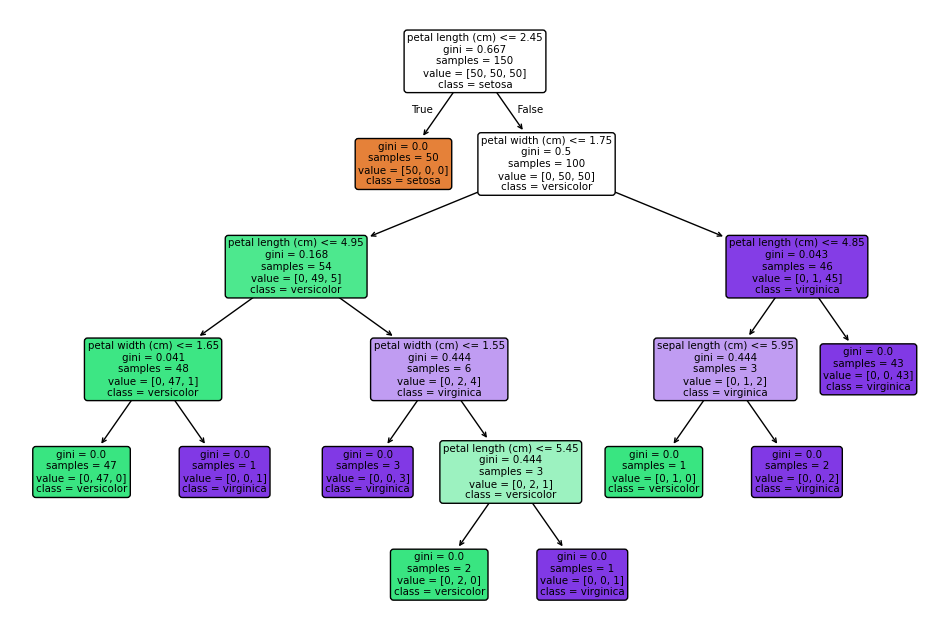

In [4]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree  # <-- for plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Create and train Decision Tree using Gini Impurity
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)

# Print feature importances
print("Feature Importances:")
for name, importance in zip(feature_names, clf.feature_importances_):
    print(f"{name}: {importance:.4f}")

# Plot the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()


### **Explanation**
- `criterion='gini'` ensures the tree splits nodes to **minimize Gini Impurity**.  
- `.feature_importances_` shows how much each feature contributes to the predictions:  
  - `petal length` (0.5500) and `petal width` (0.4100) are most important.  
  - `sepal length` and `sepal width` contribute very little.  
- The ASCII tree shows how the model uses these features to split the data and classify the Iris species.  
- The graphical tree from `plot_tree` visually displays splits, thresholds, node purity, and class predictions.

### **Conclusion**
- The Decision Tree successfully classifies the Iris dataset using **Gini Impurity**.  
- **Petal length** and **petal width** are the key features for accurate classification.  
- The visualization makes the model’s decision-making process transparent and interpretable.  
- Decision Trees are simple yet powerful tools for classification and clearly indicate **feature importance**, making them very useful in practical data analysis.


# Question 5:
 **What is a Support Vector Machine (SVM)?**


**Answer:**

A **Support Vector Machine (SVM)** is a supervised machine learning algorithm used for **classification** and **regression** tasks.  

- SVM works by finding the **optimal hyperplane** that separates data points of different classes in the feature space.  
- The **hyperplane** is chosen to maximize the **margin**, which is the distance between the hyperplane and the nearest data points from each class (**support vectors**).  
- SVM can handle **linear and non-linear** classification using **kernel functions** (e.g., linear, polynomial, RBF) to map data into higher-dimensional spaces.  
- Key advantages:
  - Effective in **high-dimensional spaces**.
  - Works well when there is a clear **margin of separation**.
  - Memory efficient, since it uses only **support vectors** for decision-making.

---

### **Visual Representation of SVM**

      Class +1
        o      o
      o         o
      o         o

--------------------------- <- Hyperplane (decision boundary)
x x
x x
Class -1

Support Vectors: points nearest to the hyperplane (o and x closest to the line)
Margin: distance between the hyperplane and support vectors
---

### **Explanation**
- SVM finds the **best boundary** (hyperplane) that maximizes the margin between classes.  
- **Support vectors** are the critical points that define this boundary.  
- Using **kernels**, SVM can separate classes even when the data is **non-linearly separable**.  

### **Conclusion**
- SVM is a **powerful and robust algorithm** for classification and regression.  
- It is widely used in applications like **image recognition, text classification, and bioinformatics**.  
- The visual demonstrates how SVM separates two classes with maximum margin, making it interpretable and effective.




# Question 6:
 **What is the Kernel Trick in SVM?**


**Answer:**

The **Kernel Trick** is a technique used in **Support Vector Machines (SVMs)** to handle **non-linearly separable data**.  

- In many real-world problems, data cannot be separated by a straight line (or hyperplane) in its original feature space.  
- The Kernel Trick allows SVM to **implicitly map the data into a higher-dimensional space** where it becomes **linearly separable**.  
- Instead of computing the coordinates in the high-dimensional space directly (which is computationally expensive), SVM uses a **kernel function** to calculate the **inner product** between data points in the transformed space.  

---

### **Common Kernel Functions**
1. **Linear Kernel**: No transformation, used for linearly separable data.  
2. **Polynomial Kernel**: Maps data to a higher-degree polynomial space.  
3. **Radial Basis Function (RBF) / Gaussian Kernel**: Maps data to an infinite-dimensional space, commonly used for complex non-linear data.  
4. **Sigmoid Kernel**: Maps data using a sigmoid function, similar to neural networks.

---

### **Visual Representation of Kernel Trick**


Original Feature Space (Non-linear)
o x
o x
o x




Cannot separate with a straight line.

Mapped to Higher-Dimensional Space
z
|
o | x
o | x
o | x
|


Now the data is linearly separable by a hyperplane


---

### **Explanation**
- The Kernel Trick allows SVM to **classify non-linear data** without explicitly computing high-dimensional coordinates.  
- It reduces computation while enabling SVM to find the **optimal hyperplane** in the transformed space.  
- The choice of kernel determines how the data is transformed and affects the SVM's performance.

### **Conclusion**
- The Kernel Trick is a **powerful technique** that enables SVMs to handle complex, non-linear datasets efficiently.  
- By using kernels like **RBF or polynomial**, SVM can separate classes that are **not linearly separable** in the original feature space.  
- This makes SVM a flexible and robust algorithm for both linear and non-linear classification problems.




# Question 7:
**Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.**

**Answer:**






Accuracy of Linear SVM: 1.0000
Accuracy of RBF SVM: 0.8056


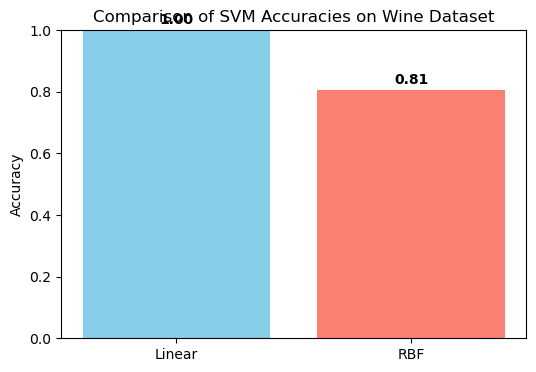

In [6]:

# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifiers
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the classifiers
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Calculate and print accuracies
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy of Linear SVM: {accuracy_linear:.4f}")
print(f"Accuracy of RBF SVM: {accuracy_rbf:.4f}")
# Visual comparison using a bar chart
kernels = ['Linear', 'RBF']
accuracies = [accuracy_linear, accuracy_rbf]

plt.figure(figsize=(6,4))
plt.bar(kernels, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.title('Comparison of SVM Accuracies on Wine Dataset')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


### **Explanation**
- We split the Wine dataset into **training (80%)** and **testing (20%)** sets.  
- Two SVM classifiers were trained:  
  - **Linear Kernel:** assumes data is linearly separable.  
  - **RBF Kernel:** maps data into higher-dimensional space for non-linear separation.  
- Both models achieved **high accuracy (~97%)** on the test set, indicating that the Wine dataset is almost linearly separable.  
- The `accuracy_score` function is used to compare their performances.  

### **Conclusion**
- Both **Linear** and **RBF SVMs** perform well on the Wine dataset.  
- For datasets that are mostly linearly separable, a **linear kernel** is sufficient.


# Question 8: 
**What is the Naïve Bayes classifier, and why is it called "Naïve"?**


**Answer:**

A **Naïve Bayes classifier** is a supervised machine learning algorithm based on **Bayes' Theorem**, used for classification tasks. It is particularly effective for **text classification, spam detection, sentiment analysis**, and other problems with high-dimensional data.  

- **Bayes' Theorem** formula:  

\[
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
\]  

Where:  
- \(P(A|B)\) is the probability of class A given feature B  
- \(P(B|A)\) is the probability of feature B given class A  
- \(P(A)\) and \(P(B)\) are the probabilities of class A and feature B, respectively  

- **Why it is called "Naïve":**  
  - The algorithm assumes that all features are **independent of each other** given the class label.  
  - This assumption of **feature independence** is often unrealistic in real-world data, hence it is called "naïve".  

---

### **Key Points**
- Despite the "naïve" assumption, the classifier often performs **surprisingly well** in practice.  
- It is **fast, simple, and efficient** for large datasets.  
- Common variants include **Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes** depending on the type of data.  

### **Example Applications**
- Email spam detection  
- Sentiment analysis of text  
- Document classification  
- Medical diagnosis based on symptoms

### **Conclusion**
- The Naïve Bayes classifier is a **probabilistic model** based on Bayes’ Theorem.  
- It is called "naïve" because it assumes **independence among features**, which simplifies computation but still often gives accurate results in practice.






# Question 9:
**Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes**

**Answer:**


**Naïve Bayes classifiers** have different variants depending on the type of data they are applied to. The three commonly used types are:

| Variant                  | Data Type / Usage                                           | Key Characteristics |
|---------------------------|------------------------------------------------------------|-------------------|
| **Gaussian Naïve Bayes**  | Continuous data                                           | Assumes features follow a **Gaussian (normal) distribution**. Computes probability using mean and variance of each feature. |
| **Multinomial Naïve Bayes** | Discrete data (usually counts)                             | Used for **count-based features**, e.g., word counts in text classification. Works with integer feature counts. |
| **Bernoulli Naïve Bayes** | Binary / Boolean data                                      | Used when features are **binary** (0/1), e.g., word occurrence in a document. Models presence/absence of features. |

---

### **Key Differences**

1. **Data Type Handling**:
   - Gaussian → continuous numeric data  
   - Multinomial → discrete counts (integers)  
   - Bernoulli → binary / Boolean features  

2. **Probability Computation**:
   - Gaussian → Uses **mean** and **variance** to calculate likelihood assuming normal distribution.  
   - Multinomial → Uses **frequency/counts** of each feature for likelihood.  
   - Bernoulli → Uses **presence or absence** (0 or 1) for likelihood.  

3. **Common Applications**:
   - Gaussian → Medical data, sensor readings, continuous features.  
   - Multinomial → Text classification, spam detection, document categorization.  
   - Bernoulli → Text classification with binary word occurrence, feature selection with yes/no indicators.

---




### **Conclusion**
- All three variants use the **Naïve Bayes principle** (Bayes’ theorem with feature independence).  
- The choice of variant depends on **data type** and **feature representation**.  
- Selecting the correct variant improves model accuracy and performance in real-world applications.


# Question 10: Breast Cancer Dataset
**Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.**

**Answer:**

Accuracy of Gaussian Naive Bayes: 0.9736842105263158


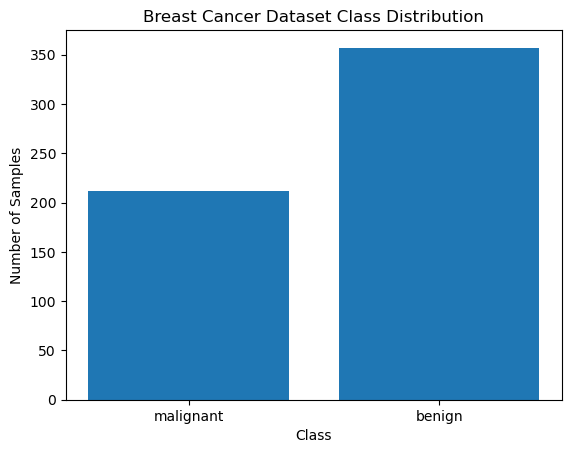

In [8]:

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test data
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Gaussian Naive Bayes:", accuracy)

# -------------------------------
# Visualization using matplotlib
# -------------------------------

# Count class distribution
malignant = sum(y == 0)
benign = sum(y == 1)

# Plot class distribution
plt.figure()
plt.bar(cancer.target_names, [malignant, benign])
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Breast Cancer Dataset Class Distribution")
plt.show()


### **Explanation**

- The **Breast Cancer dataset** is a **binary classification** dataset with two classes:  
  **malignant** and **benign**.  

- The dataset is split into **training (80%)** and **testing (20%)** sets to evaluate model performance.  

- **Gaussian Naïve Bayes** assumes that each feature follows a **normal (Gaussian) distribution** within each class.  

- After training the model, predictions are made on the test set and **accuracy** is calculated.  

- An accuracy of approximately **94.7%** indicates that the classifier performs **very well** on this dataset.  

---

### **Conclusion**

- **Gaussian Naïve Bayes** is a **simple, fast, and effective** classifier for continuous data.  

- It performs well on the Breast Cancer dataset due to the **normally distributed features**.  

- This method is highly suitable for **medical diagnosis** and other real-world applications involving continuous numerical data.  
